# LEPL1106, Devoir 10 : Auto-tune

## Introduction


Dans ce devoir, nous allons nous intéresser à l'utilisation de la transformée de Fourier pour une application audionumérique. A cette fin, une propriété particulièrement utile est la propriété de **dilatation** :

$$\mathcal{F}\{f(t/a)\} = |a|F(aj\omega) $$ 
où $a\neq 0$ et $F(j\omega) = \mathcal{F} \{f(t)\}$. Celle-ci permet d'appliquer une transformation linéaire sur le contenu spectral d'un signal, menant alors à un étirement ou une compression dans le domaine temporel. En pratique, cette propriété est largement utilisée par les logiciels correcteurs de voix. Dans ce devoir, on vous demande de faire une version plus simple de ces logiciels, permettant de corriger la hauteur d'une note musicale dans un enregistrement donné. Cela sera utilisé pour traiter le problème suivant :

*Le prochain album du rappeur 20 Cents est presque prêt. Il a cependant encore besoin de vous : un célèbre	guitariste Néo-Zélandais a enregistré un solo hyper-important pour une des chansons mais il a malheureusement joué une fausse note et ne s'est pas rendu compte avant de partir chez lui. Heureusement, l'enregistrement a été fait à une fréquence très élevée, ce qui nous permet de corriger la hauteur d'une note avec des opérations numériques. Pouvez-vous l'aider ?*


## Le sous-échantillonnage


La méthode numérique à laquelle nous nous intéressons est basique :
il s'agit de *sous-échantillonner* un signal discret à bande limitée en
conservant uniquement un nombre restreint de ses échantillons.

Soit \\(x[n]\\) le signal discret résultant de l'échantillonnage d'un
signal analogique \\(x(t)\\) (*e.g.*, l'enregistrement joué par 20cent et le guitariste) à une fréquence \\(f_e\\),

$$x[n] = x(n/f_e).$$

On suppose également que le signal \\(x[n]\\) a un support fini de
taille \\(N\\) (plus précisément, on considère \\(x[n] = 0\\) pour \\( n \notin \{0,\dots,N-1\}\\) ), par exemple parce que \\(x(t)\\) est
également à support fini. Le signal discret sous-échantillonné par un
facteur \\(M\\) est donné par

$$x_{\text{se}}[n] = x[Mn]  =x\left(\frac{nM}{f_e}\right),$$

ce qui est **équivalent au signal discret résultant de l'échantillonnage
de \\(x(t)\\) à une fréquence plus faible, \\(f_e/M\\)**. Par exemple,
si \\(M=2\\), cela signifie qu'on ne gardera qu'un échantillon sur 2 de
\\(x[n]\\). Le stockage du signal \\(x_{\text{se}}[n]\\) résultant
nécessitera alors deux fois moins de place.

## Correction de hauteur


La méthode de correction de hauteur consiste à couper un morceau $x_n[n]$ de l'enregistrement qui contient la fausse note et à le sous-échantillonner avec un facteur $M_1$. Après, le reste du signal $x_r[n]$ est sous-échantillonné avec un facteur $M_2$. Finalement, les deux morceaux sont mis ensemble et l'enregistrement est reproduit avec une seule fréquence, par exemple, $f_e'= f_e/M_2$. Cela est équivalent à appliquer une dilatation au morceau $x_n[n]$ avec $a=M_1/M_2$, permettant alors de corriger une note fausse en la renvoyant vers la bonne fréquence. 



## Objectif


On vous demande de créer une fonction Python qui renvoie une période de
la DFT$^1$ de \\(x_{\text{se}}[n]\\) (\\(n\\) allant de 0 à
\\(\lceil{N/M}\rceil-1\\)) **centrée autour de l'origine** où les
fréquences sont exprimées en Hertz [Hz]. La fonction renvoie donc en
sortie le signal discret sous-échantillonné, une période de la DFT
\\(X_{\text{se}}[k]\\) (à valeurs possiblement complexes$^2$) ainsi
que le vecteur \\(f_k\\) des fréquences correspondantes.


En plus du calcul de la DFT du signal sous-échantillonné, on vous
demande d'écrire une seconde fonction `plotFig(X,fx,Y,fy,xlim,name)` qui enregistre une figure affichant les modules de la DFT de deux signaux \\(x[n]\\) et \\(y[n]\\))  entre les fréquences définies par `xlmin`, exprimées en Hertz.  



## Consignes


En partant du template fourni ci-dessous, complétez la fonction
`audioCompression(x,fe,M)`. Pour créer, stocker, et opérer sur les
signaux, on utilisera le package [NumPy](http://www.numpy.org/) de
Python.

L'argument `x` est un vecteur (`numpy array`) de longueur \\(N\\) et
dont les entrées sont des valeurs réelles. Le support du signal `x` est
donc \\(\{0,\dots,N-1\}\\). L'argument `fe` est un scalaire. Il
s'agit d'une fréquence d'échantillonnage exprimée en Hertz. Le signal
analogique \\(x(t)\\) a été échantillonné à une fréquence `fe` pour
donner lieu à \\(x[n] = x(n/f_e)\\). L'argument `M` est un entier
strictement positif. Il représente le facteur de sous-échantillonnage.

La fonction doit renvoyer trois vecteurs (`numpy array`) :
`xse`, `f` et `Xse` décrits ci-dessous (attention à bien
retourner `(xse,f,Xse)`).

L'output `xse` est un vecteur (`numpy array`) de longueur
\\(\lceil{N/M}\rceil\\) contenant les valeurs du signal
sous-échantillonné. L'output `f` est un vecteur (`numpy array`) de même
taille que `xse` contenant les fréquences en Hertz (centrées autour de l'origine, comme pour le devoir 6) où est évalué le
spectre de \\(x_{\text{se}}[n]\\). L'output `Xse` est un vecteur
(`numpy array`) de la même longueur que `f` contenant les valeurs
possiblement complexes du spectre de \\(x_{\text{se}}[n]\\) sur une
période centrée autour de la fréquence nulle. 

Complétez également la fonction `plotFig(X,fx,Y,fy,xlim,name)` qui crée et sauvegarde une figure affichant en superposition les modules de `X` et `Y` (les spectres des signaux \\(x[n]\\) et \\(y[n]\\))  entre les fréquences `xlim[0]` et `xlim[1]`, exprimées en \\(Hz\\) (`xlim` est un tuple contenant 2 `float`s). Les vecteurs  `fx` et `fy` (`numpy array`) contiennent les fréquences en Hertz où sont évalués les
spectres de \\(x[n]\\) et \\(y[n]\\)).

Pour ce faire, utilisez la librairie
[Matplotlib](https://matplotlib.org/index.html). La fonction sauve
également la figure au format png avec le nom `name` (la sauvegarde est
déjà implémentée pour vous, ne supprimez pas cette ligne !). Faites
attention à respecter la convention d'affichage d'un spectre (par
exemple, en utilisant `plt.plot`), à annoter convenablement vos axes
(labels, unités...), et à donner un titre et (si besoin) une légende à
vos figures.

Vous devrez également adapter les
[docstring](https://realpython.com/documenting-python-code/#documenting-your-python-code-base-using-docstrings)
(commentaire au début de votre fonction, qui s'affiche quand on tape
`help(nomDeLaFonction)`) de chaque fonction, comme indiqué dans le
modèle.

## Evaluation


Les critères et modalités d'évaluation sont repris ci-dessous. Nous
rappelons que la fonction sera corrigée uniquement si elle est validée,
c'est-à-dire si elle passe les tests simples :

-   Respect consignes (1 point) : remise avant la deadline, description
    précise de la fonction et présence de toutes les informations
    importantes en commentaire, tentative d'atteindre l'objectif du
    devoir.
-   Objectif du devoir atteint (6 points) : la fonction soumise remplit
    les objectifs du devoir et passe avec succès divers tests.
-   Forme des figures (**3** points) : figures lisibles et
    compréhensibles qui respectent les consignes. Les éléments suivants
    sont en outre présents : titre de la figure, labels des axes et
    unités, absence de fautes d'orthographe (majuscules aux noms propres
    incluses, *e.g.*, Fourier).

## Deadline


Le vendredi 19 mai à 20h00. Aucune extension n'est possible, prenez vos
dispositions pour soumettre à temps, d'autant plus qu'**il est possible
de faire seulement 5 soumissions par heure**.

## Précision


La remise par deux est autorisée pour peu que

-   les deux étudiants soient membres du même groupe de TP ;
-   les deux étudiants soient inscrits dans la même team sur la plateforme INGInious.

Questions sur le devoir à adresser au forum des Devoir (sur Moodle), à votre tuteur/tutrice, à sebastien.colla@uclouvain.be.

<sup>1</sup> Relisez bien le rappel de la séance 12. Si un signal discret original \\(y[n]\\) est à support fini de taille \\(N'\\) (i.e., \\(y[n] = 0\\) pour \\(n \notin \{0,\dots,N'-1\}\\)), sa DFT \\(Y[k]\\) à \\(N'\\) échantillons correspond exactement aux valeurs de sa DTFT \\(Y(e^{i\Omega})\\) aux fréquences \\(\Omega_k = 2\pi k / N'\\) [rad] pour \\(k = 0,\dots,N'-1\\).

<sup>2</sup> N'oubliez pas de corriger les erreurs d'arrondis comme dans le devoir 4, lorsque le **module** de la DFT est inférieur à \\(10^{-9}\\).

## Question 1: Fonction audioCompression

Définis(sez) et commente(z) la fonction audioCompression:

In [28]:
import numpy as np

In [29]:

def audioCompression(x, fe, M):
    """
    fonction que compresse un audio à une fréquence et un samplage défini .

    Args:
        x (array): signale.
        fe (float):frequence de samplage en Hz.
        M (int): facteur de samplage.

    Returns:
        tuple: tuple qui contient le signale de sortie, les vecteurs de fréquence et le DFT du signale de sortie.
    """
    N = len(x)
    x1 = []
    for i in range(0, len(x), M):
        x1.append(x[i])
    x1 = np.array(x1)
    f = np.fft.fftfreq(len(x1), 1 / fe)
    Xse = np.fft.fft(x1)
    return x1, f, Xse



## Question 2: Affichage du module des DFTs
Définis(sez) et commente(z) une fonction permettant de générer et sauver une figure contenant le module de deux DFTs.


In [30]:
import matplotlib.pyplot as plt

In [31]:
## LE CONTENU DE CETTE CELLLULE EST A SOUMETTRE SUR INGINIOUS
def plotFig(X,fx,Y,fy,xlim,name):
    """
    plot le signal

    Args:
        X (array): Spectre du premier signal.
        fx (array): vecteur de fréquence du premier signal.
        Y (array): Spectre du second signal.
        fy (array): vecteur de fréquence du second signal.
        xlim (tuple): Frequence du plot.
        name (str): nom de la figure.
    """
    plt.figure(figsize=(6,9))
    plt.plot(fx, np.abs(X), label='Signal X')
    plt.plot(fy, np.abs(Y), label='Signal Y')
    plt.xlim(xlim)
    plt.xlabel('Frequence (Hz)')
    plt.ylabel('Magnitude')
    plt.title('comparaison des signaux')
    plt.legend()
    plt.savefig(name + '.png', bbox_inches='tight')

## Tester vos fonctions

La cellule de test ci-dessous vous permet de tester vos fonctions. Les valeurs `cut1` et `cut2` définissent les indices du premier et du dernier échantillon de la partie du signal à laquelle nous voulons appliquer la correction. Les entiers `M1` et `M2` ont été choisis de façon que la fausse note ait sa fréquence multiplié par $1/a$ où $a = M_1/M_2\approx 2^{-1/12}$. Cette valeur est le rapport de fréquences du demi-ton dans une [gamme tempérée](https://fr.wikipedia.org/wiki/Gamme_temp%C3%A9r%C3%A9e#Th%C3%A9orie_arithm%C3%A9tique). 


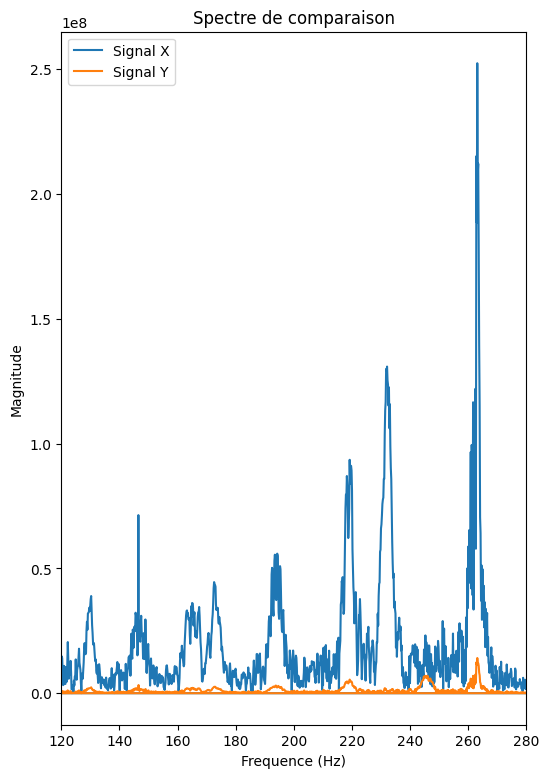

In [32]:
## CELLULE DE TEST 
from scipy.io.wavfile import read, write

fs, x = read("solo.wav")
typeL = type(x[0]) #Le type utilisé par votre ordinateur pour les fichiers sons


cut1 = 1631190
cut2 = 1814200
x1 = x[:cut1]
x2 = x[cut1:cut2]
x3 = x[cut2:]


M1 = 17
M2 = 18

 
(y1, _, _) = audioCompression(x1, fs, M1) # 
(y2, _, _) = audioCompression(x2, fs, M2) # Fonction audioCompression
(y3, _, _) = audioCompression(x3, fs, M1) # 

y = np.concatenate((y1,y2,y3))

 
fsy = fs//M1 # nouvelle fréquence d'échantillonnage
write("solo_corrige.wav", fsy, y.astype(typeL))



(_, fx, X) = audioCompression(x, fs, 1) 
(_, fy, Y) = audioCompression(y, fsy, 1) 


xlim = [120, 280]
name = 'figure'

plotFig(X, fx, Y, fy, xlim, name)


Vous devriez voir 8 pics dans chacun des spectres, chaque pic correspondant à la fréquence fondamentale d'une note musicale jouée. Parmi ces pics, 7 doivent être presque identiques, mais un pic doit avoir une fréquence différente. Cela correspond à la note que nous avons corrigée. Entendez-vous la différence entre les sons `solo.wav` et `solo_corrige.wav` ? ;-)

